<a href="https://colab.research.google.com/github/canyue1111/CustomerMonitor/blob/main/transferLearning_emtoinmodel_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#face detect 

In [ ]:
import os
import matplotlib.pyplot as plt


In [ ]:
import numpy as np

from keras.models import Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False


In [ ]:
from tensorflow.keras import Model
x = layers.GlobalAveragePooling2D()(resnet_model.output)
#x = layers.Dense(1024, activation = 'relu')(x)

# Add a final sigmoid layer for classification
x = layers.Dense(7, activation='softmax')(x)        

emotion_model = Model(resnet_model.input, x) 

emotion_model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
emotion_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
classes = [0,1,2,3,4,5,6]
IMG_SIZE = 224

In [ ]:
#Under google drive file
folder = os.path.join('/content/drive/MyDrive/facialemotion/train')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
      validation_split=0.33,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1/255)




In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
BATCH_SIZE = 32
IMG_SIZE = 224

train_ds =  train_datagen.flow_from_directory(directory=folder, 
                                        subset='training',
                                        target_size=(IMG_SIZE, IMG_SIZE),
                                        batch_size=BATCH_SIZE)

Found 21599 images belonging to 7 classes.


In [ ]:
valid_ds =  train_datagen.flow_from_directory(directory=folder, 
                                        subset='validation',
                                        target_size=(IMG_SIZE, IMG_SIZE),
                                        batch_size=BATCH_SIZE)

Found 10634 images belonging to 7 classes.


In [ ]:
hist = emotion_model.fit(train_ds,
                 validation_data=valid_ds,
                 epochs=1)

 40/675 [>.............................] - ETA: 2:51:31 - loss: 2.0321 - accuracy: 0.1918

KeyboardInterrupt: ignored

In [ ]:
emotion_model.save('emotion_model.h5')

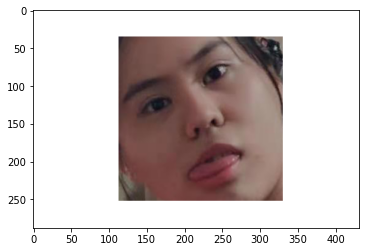

'Neutral'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np

 #(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
emotion_class = ['Angry','Disgust','Fear', 'Happy', 'Sad','Surprise','Neutral']


def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(197, 197))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with  channe 3
    img = img.reshape(1, 197, 197, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread('20_201.png')
plt.axis('off')
imgplot = plt.imshow(img1)
plt.show()
img = load_image("20_201.png")


model= load_model('emotion_model.h5')
#model = keras.models.load_model('emotion_model.h5')
emotion_class[np.argmax(model.predict(img))]